# Standardized Test Analysis

## Problem Statement

- Since College Board has changed the format of the SAT/ACT. The participation and average scores by state have changed from 2016 - 2019.  My analysis aims to explore this change year by year and what state is being effected the most by this change.


<!-- ACT -->
1) act_2017.csv - contains act data regarding the year 2017
2) act_2018.csv - contains act data regarding the year 2018
3) act_2019.csv - contains act data regarding the year 2019
<!--  SAT -->
4) sat_2017.csv - contains sat data regarding the year 2017
5) sat_2018.csv - contains sat data regarding the year 2018
6) sat_2019.csv - contains sat data regarding the year 2019

## Outside Research

1) https://www.bestcolleges.com/blog/act-vs-sat/
2) https://www.princetonreview.com/college/sat-act#:~:text=Both%20ACT%20and%20SAT%20scores,one%20test%20over%20the%20other.

## Challenge

1. Calculate mean:

In [1]:
# Code:
import random
test = [random.randint(1,100) for i in range(0,200)]
def cal_mean(temp):
    summ = []
    for i in temp:
        summ.append(i)
    return sum(summ)/len(temp)

# Testing
cal_mean(test)


53.365

2. Calculate standard deviation:

In [2]:
# Code:
test = [random.randint(1,100) for i in range(0,200)]
def cal_std(temp):
    mean = cal_mean(temp)
    summ = []
    for i in temp:
        summ.append((i - mean)**2)
    return (sum(summ)/len(temp))**0.5

# Testing
cal_std(test)

29.922431385166536

3. Data cleaning function:
    
    Fixing string formating that is a number and a percent symbol and converts to a float that is the decimal approximation of the percent. 


In [3]:
# Code:
def string_float(temp):
    if '%' in temp:
        temp = temp[:-1]

        return float(temp)
    else:
        return float(temp)

# Testing
string_float('50.5%')

50.5

## Import libraries and Data

In [4]:
# %pip install -U kaleido

In [5]:
# Imports:
import pandas as pd
import numpy as np
import random
import re
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline
sns.set(style="darkgrid")

In [6]:
# read CSV's
# ACT
df_ACT_2017 = pd.read_csv('../data/act_2017.csv')
df_ACT_2018 = pd.read_csv('../data/act_2018.csv')
df_ACT_2019 = pd.read_csv('../data/act_2019.csv')


# SAT
df_SAT_2017 = pd.read_csv('../data/sat_2017.csv')
df_SAT_2018 = pd.read_csv('../data/sat_2018.csv')
df_SAT_2019 = pd.read_csv('../data/sat_2019.csv')


# df_SAT_2019_icm = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')


## First 5 rows

### ACT

#### 2017

In [7]:
df_ACT_2017.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 2018

In [8]:
df_ACT_2018.head(5)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


#### 2019

In [9]:
df_ACT_2019.head(5)

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


### SAT

#### 2017

In [10]:
df_SAT_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 2018

In [11]:
df_SAT_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


#### 2019

In [12]:
df_SAT_2019.head(5)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


## Rename columns
Drop unnecessary rows (if needed).

In [13]:
# change ACT columns
df_ACT_2017.columns= df_ACT_2017.columns.str.lower()
df_ACT_2018.columns= df_ACT_2018.columns.str.lower()
df_ACT_2019.columns= df_ACT_2019.columns.str.lower()

# change SAT columns
df_SAT_2017.columns= df_SAT_2017.columns.str.lower()
df_SAT_2018.columns= df_SAT_2018.columns.str.lower()
df_SAT_2019.columns= df_SAT_2019.columns.str.lower()

# df_SAT_2019_icm.columns= df_SAT_2019_icm.columns.str.lower()


## Data Dictionary Function

In [14]:
# Standard deviation dictionary function
def std_dict(df):
    return {df.columns[x]:round((df[df.columns[x]].dropna()).std(),2) for x,col_type in enumerate(df.dtypes) if ((str(col_type) == 'float64') | (str(col_type) == 'int64'))}

In [15]:
# Standard deviation dictionary
sd = std_dict(df_ACT_2017)
sd


{'english': 2.33, 'math': 1.96, 'reading': 2.05, 'science': 3.15}

## EDA ACT 

### See Missing Values
Check for missing values.

In [16]:
df_ACT_2017.isna().sum()

state            0
participation    0
english          0
math             0
reading          0
science          0
composite        0
dtype: int64

In [17]:
df_ACT_2018.isna().sum()

state            0
participation    0
composite        0
dtype: int64

In [18]:
df_ACT_2019.isna().sum()

state            0
participation    0
composite        0
dtype: int64

### Change Dtypes / Drop Unecessary Data 

#### 2017

In [19]:
# change datatypes, and clean
df_ACT_2017['participation'] = df_ACT_2017['participation'].apply(string_float)
df_ACT_2017['composite'] = df_ACT_2017['composite'].apply(lambda x: re.sub(r'[^0-9^\-\.]+', '', x)).replace('', np.float64(0)).astype('float64')
# drop unecessary col
df_ACT_2017_cleaned = df_ACT_2017.drop(['english', 'math', 'reading', 'science'], axis=1)

#### 2018

In [20]:
# change data types
df_ACT_2018['participation'] = df_ACT_2018['participation'].apply(string_float)
df_ACT_2018_cleaned = df_ACT_2018.convert_dtypes()

#### 2019

In [21]:
# change datatype
df_ACT_2019['participation'] = df_ACT_2019['participation'].apply(string_float)
df_ACT_2019_cleaned = df_ACT_2019.convert_dtypes()

### Make df's as csv's

In [22]:
df_ACT_2017_cleaned.to_csv('../new_data/ACT_2017_cleaned.csv', index=False)
df_ACT_2018_cleaned.to_csv('../new_data/ACT_2018_cleaned.csv', index=False)
df_ACT_2019_cleaned.to_csv('../new_data/ACT_2019_cleaned.csv', index=False)
# clened_ACT_CA_c_avg.to_csv('../new_data/clened_ACT_CA_c_avg.csv', index=False)

#### ACT Data Dictionary:
ACT_2017_clearned


| Field Name         | Type                   | Description                       |
| ------------------ | ---------------------------------------------------------- |
| **State**          | string                 | States Name                       |                    
| **Participation**  | float                  | Percent of Participation of ACT   |
| **Composite**      | float                  | Average Composite Score of ACT    | 


ACT_2018_clearned

| Field Name         | Type                   | Description                       |
| ------------------ | ---------------------------------------------------------- |
| **State**          | string                 | States Name                       |                    
| **Participation**  | float                  | Percent of Participation of ACT   |
| **Composite**      | float                  | Average Composite Score of ACT    | 


ACT_2019_clearned

| Field Name         | Type                   | Description                       |
| ------------------ | ---------------------------------------------------------- |
| **State**          | string                 | States Name                       |                    
| **Participation**  | float                  | Percent of Participation of ACT   |
| **Composite**      | float                  | Average Composite Score of ACT    | 


## ACT Findings/Visuals

In [23]:
# add year column for concat features
df_ACT_2017_cleaned['year'] = 2017
df_ACT_2018_cleaned['year'] = 2018
df_ACT_2019_cleaned['year'] = 2019


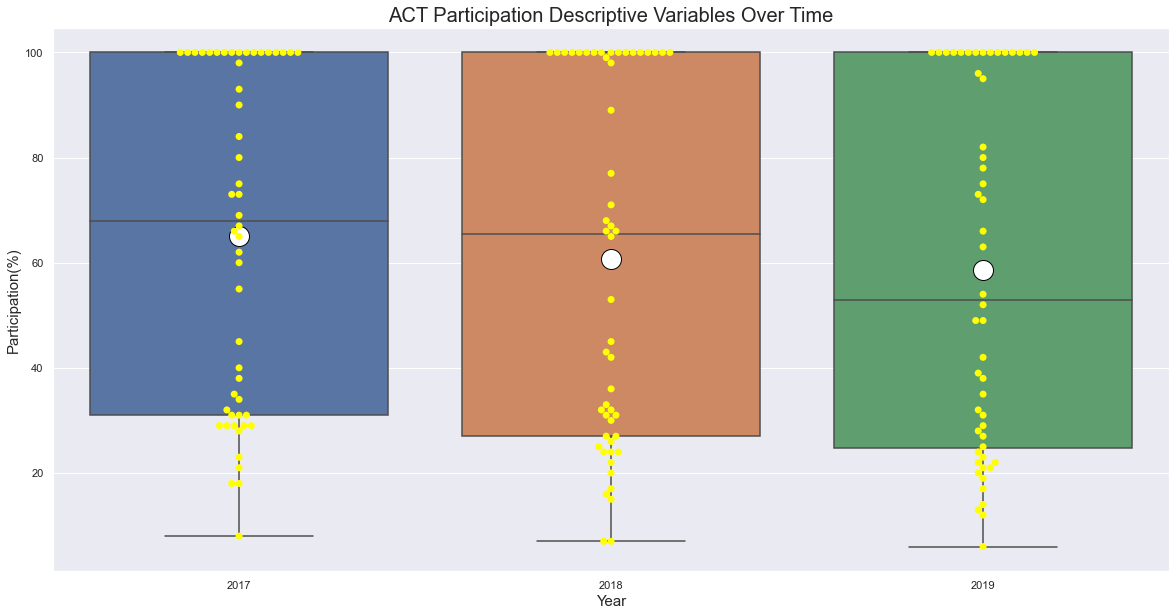

In [24]:
# combine df
df = pd.concat([df_ACT_2017_cleaned, df_ACT_2018_cleaned, df_ACT_2019_cleaned])
# make boxplot
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(x='year', y='participation', data=df, showmeans=True, 
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"20"})
# add scatter aspect
sns.swarmplot(x='year', y='participation', data=df, color="yellow", size=7)

# labels
plt.ylabel("Participation(%)", size=15)
plt.xlabel("Year", size=15)
plt.title("ACT Participation Descriptive Variables Over Time", size=20)
plt.savefig("./img/part_descrip_ACT.png")

In [25]:
# print means
print(round(df_ACT_2017_cleaned.describe().mean()['participation'], 2))
print(round(df_ACT_2018_cleaned.describe().mean()['participation'], 2))
print(round(df_ACT_2019_cleaned.describe().mean()['participation'], 2))

57.0
55.84
53.56


Analysis:
As you can see each year the Participation mean each year gets smaller.  This is heavily correlated to colleges becoming less relient on ACT scores in general?

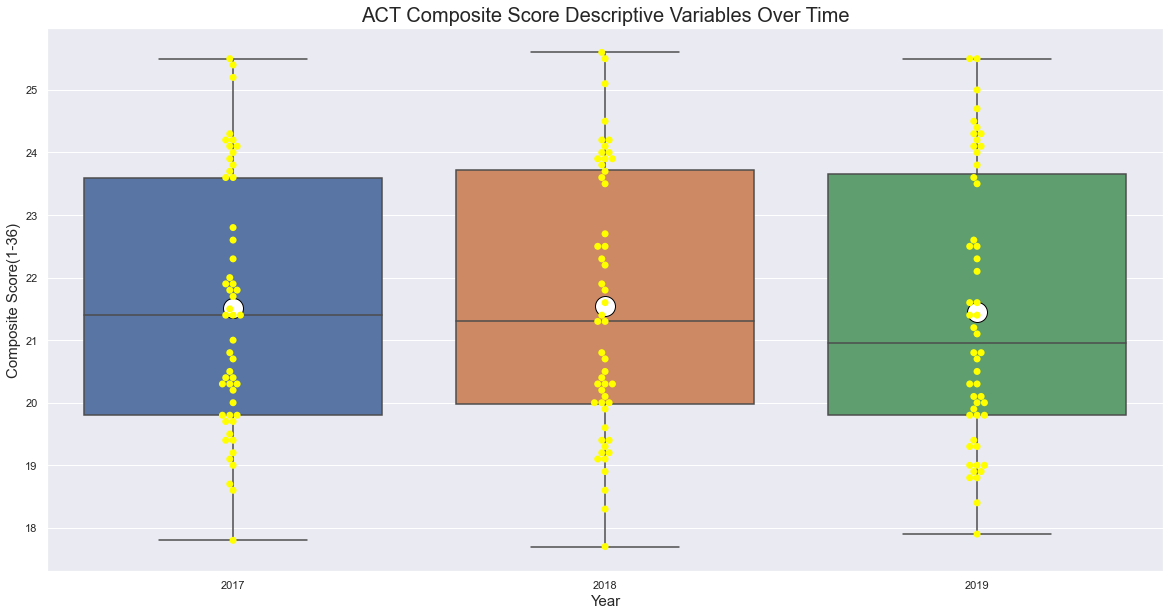

In [26]:
# combine df's
df = pd.concat([df_ACT_2017_cleaned, df_ACT_2018_cleaned, df_ACT_2019_cleaned])
# make plot
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(x='year', y='composite', data=df, showmeans=True, 
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"20"})
# add scatter aspect
sns.swarmplot(x='year', y='composite', data=df, color="yellow", size=7)
# labels
plt.ylabel("Composite Score(1-36)", size=15)
plt.xlabel("Year", size=15)
plt.title("ACT Composite Score Descriptive Variables Over Time", size=20)
plt.savefig("./img/comp_descrip_ACT.png")

In [27]:
# print mean  
print(round(df_ACT_2017_cleaned.describe().mean()['composite'], 0))
print(round(df_ACT_2018_cleaned.describe().mean()['composite'], 0))
print(round(df_ACT_2019_cleaned.describe().mean()['composite'], 0))

23.0
23.0
23.0


Analysis: With a lower participation year by year you can see that this doesnt effect the composition score much but you can still see in 2019 of individuals below the mean is more clustered then that of past years.  Could this be due to A specifc state or harder tests being administered.

In [28]:
# combine df
df_ACT = pd.concat([df_ACT_2017_cleaned, df_ACT_2018_cleaned, df_ACT_2019_cleaned])
# convert dtypes
df_ACT = df_ACT.convert_dtypes()
df_ACT.reset_index(inplace=True)


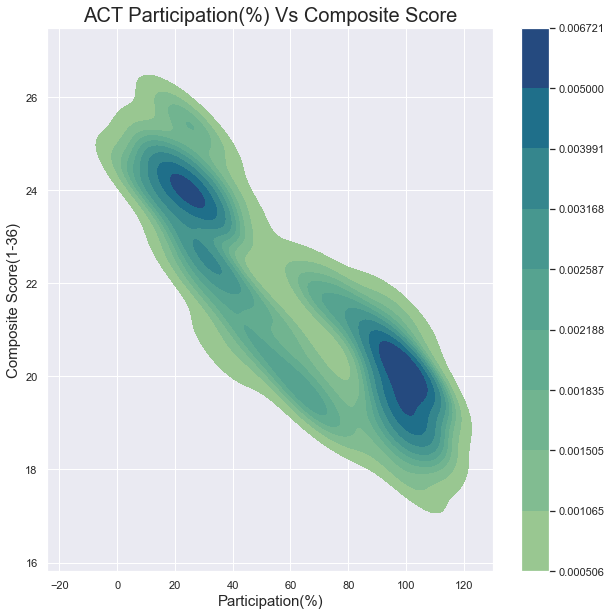

In [29]:
# kdeplot heat map
sns.set(rc = {'figure.figsize':(10,10)})
# plot
sns.kdeplot(x=df_ACT['participation'], y=df_ACT['composite'], cmap="crest", shade=True, bw_adjust=0.7, cbar=True)
# label
plt.ylabel("Composite Score(1-36)", size=15)
plt.xlabel("Participation(%)", size=15)
plt.title("ACT Participation(%) Vs Composite Score", size=20)
plt.savefig("./img/part_comp_ACT.png")

Analysis: As you can see the more participation the more the the composite score drops. (This can be seen in the darker blue areas.)

### States with lowest participation and score each year

In [30]:
# make subplot
fig = make_subplots(rows=2, cols=3, specs = [[{}, {}, {}],[{}, {}, {}]], horizontal_spacing = 0.12, vertical_spacing=0.15)

# 2017 High Comp Score/ Participation top 5
worst_ACTp_2017 = df_ACT_2017_cleaned.sort_values(by='participation').head(5)
# 2017 Low Comp Score/ Participation top 5
worst_ACTc_2017 = df_ACT_2017_cleaned.sort_values(by='composite').head(5)
# row 1 col 1 High Score
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTp_2017["participation"], y=worst_ACTp_2017["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1', legendgrouptitle_text="Participation", name="%"),
    row=1, col=1
)
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTp_2017["composite"], y=worst_ACTp_2017["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2', legendgrouptitle_text='Average Composite Score', name="Composite Score"),
    row=1, col=1
)

# row 2 col 2 Low Score
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTc_2017["participation"], y=worst_ACTc_2017["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=2, col=1
)
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTc_2017["composite"], y=worst_ACTc_2017["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=2, col=1
)
# label col
fig.update_xaxes(title_text="2017", row=2, col=1)

# 2018 High Comp Score/ Participation top 5
worst_ACTp_2018 = df_ACT_2018_cleaned.sort_values(by='participation').head(5)
# 2018 Low Comp Score/ Participation top 5
worst_ACTc_2018 = df_ACT_2018_cleaned.sort_values(by='composite').head(5) 
# row 1 col 2
# add  trace
fig.add_trace(
    go.Bar(x=worst_ACTp_2018["participation"], y=worst_ACTp_2018["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=1, col=2
)
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTp_2018["composite"], y=worst_ACTp_2018["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=1, col=2
)

# row 2 col 2
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTc_2018["participation"], y=worst_ACTc_2018["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=2, col=2
)
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTc_2018["composite"], y=worst_ACTc_2018["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=2, col=2
)
# label col
fig.update_xaxes(title_text="2018", row=2, col=2)

# 2019 High Comp Score/ Participation top 5
worst_ACTp_2019 = df_ACT_2019_cleaned.sort_values(by='participation').head(5)
# 2019 Low Comp Score/ Participation top 5
worst_ACTc_2019 = df_ACT_2019_cleaned.sort_values(by='composite').head(5)
# row 1 col 3
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTp_2019["participation"], y=worst_ACTp_2019["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=1, col=3
)
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTp_2019["composite"], y=worst_ACTp_2019["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=1, col=3
)

# row 2 col 3
# add trace
fig.add_trace(
    go.Bar(x=worst_ACTc_2019["participation"], y=worst_ACTc_2019["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=2, col=3
)
fig.add_trace(
    go.Bar(x=worst_ACTc_2019["composite"], y=worst_ACTc_2019["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=2, col=3
)
#label col
fig.update_xaxes(title_text="2019", row=2, col=3)

# label y axis
fig.update_yaxes(title_text="Low Score", row=2, col=1)
fig.update_yaxes(title_text="High Score", row=1, col=1)

# update layout
fig.update_layout(
    boxmode='group', 
    boxgap=0.8,
    boxgroupgap=0.7,
    paper_bgcolor='rgba(0,0,0,0)',
    showlegend=True,
    title_text="Top 5 ACT Low and High Composite Scores/Participation(%)"
)

# fig.write_image(file='./img/low_high_5_ACT.png', format='png', width=1000)

In [31]:
# find most common states in participation
worst_partic = pd.concat([worst_ACTp_2017, worst_ACTp_2018, worst_ACTp_2019])
ACT_worstp_state = worst_partic.groupby(['state'])['state'].count().sort_values(ascending=True)
# find most common states in composite
worst_composite = pd.concat([worst_ACTc_2017, worst_ACTc_2018, worst_ACTc_2019])
ACT_worstc_state = worst_composite.groupby(['state'])['state'].count().sort_values(ascending=True)
print(ACT_worstp_state)
print(ACT_worstc_state)

state
Pennsylvania     2
Delaware         3
New Hampshire    3
Rhode Island     3
Maine            4
Name: state, dtype: int64
state
Louisiana         1
Oklahoma          1
Hawaii            2
North Carolina    2
Mississippi       3
Nevada            3
South Carolina    3
Name: state, dtype: int64


In [32]:
avg_composite_low_participation = pd.concat([worst_ACTp_2017, worst_ACTp_2018, worst_ACTp_2019])
# get the values for the top 5 low rows graphed
print(avg_composite_low_participation.groupby(['state'])['composite'].mean())
print(avg_composite_low_participation.groupby(['state'])['participation'].mean())

state
Delaware         24.00
Maine            24.15
New Hampshire    25.20
Pennsylvania     23.65
Rhode Island     24.30
Name: composite, dtype: float64
state
Delaware         16.0
Maine             7.0
New Hampshire    16.0
Pennsylvania     20.0
Rhode Island     16.0
Name: participation, dtype: Float64


In [33]:
avg_composite_high_participation = pd.concat([worst_ACTc_2017, worst_ACTc_2018, worst_ACTc_2019])
# get the values for the top 5 high rows graphed
print(avg_composite_high_participation.groupby(['state'])['composite'].mean())
print(avg_composite_high_participation.groupby(['state'])['participation'].mean())

state
Hawaii            18.950000
Louisiana         18.800000
Mississippi       18.533333
Nevada            17.800000
North Carolina    19.100000
Oklahoma          18.900000
South Carolina    18.600000
Name: composite, dtype: float64
state
Hawaii                 89.5
Louisiana             100.0
Mississippi           100.0
Nevada                100.0
North Carolina        100.0
Oklahoma              100.0
South Carolina    92.666667
Name: participation, dtype: Float64


In terms of sates being affected the most by the new format of the ACT.

For States with high Composite Scores: 
- New Hampshire Score:25 and has partcipations:16%
- Rhode Island Score:24 and has partcipations:16%
- Maine Score:24 and has partcipations:7%

For States with low Composite Score:
- Mississippi Score:19 and has partcipations:100%
- Nevada Score:18 and has partcipations:100%
- South Carolina Score:19 and has partcipations:93%

## SAT Analysis

### See Missing Values

In [34]:
df_SAT_2017.isna().sum()

state                                 0
participation                         0
evidence-based reading and writing    0
math                                  0
total                                 0
dtype: int64

In [35]:
df_SAT_2018.isna().sum()

state                                 0
participation                         0
evidence-based reading and writing    0
math                                  0
total                                 0
dtype: int64

In [36]:
df_SAT_2019.isna().sum()

state                 0
participation rate    0
ebrw                  0
math                  0
total                 0
dtype: int64

### Change/Drop Data

#### 2017

In [37]:
# drop unecessary col
SAT_2017_cleaned = df_SAT_2017.drop(columns=['evidence-based reading and writing', 'math'])
# change data types
SAT_2017_cleaned['participation'] = SAT_2017_cleaned['participation'].apply(string_float)

In [38]:
SAT_2017_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     float64
 2   total          51 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


#### 2018

In [39]:
# drop unecessary col
SAT_2018_cleaned = df_SAT_2018.drop(columns=['evidence-based reading and writing', 'math'])
# convert datatypes
SAT_2018_cleaned['participation'] = SAT_2018_cleaned['participation'].apply(string_float)

In [40]:
SAT_2018_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     float64
 2   total          51 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


#### 2019

In [41]:
# rename col names
df_SAT_2019.rename(columns={'participation rate': 'participation'}, inplace=True)
# mask 2019 SAT data
df_SAT_2019 = df_SAT_2019[df_SAT_2019['participation'] != '—']
# drop df col 
SAT_2019_cleaned = df_SAT_2019.drop(columns=['ebrw', 'math'])
SAT_2019_cleaned['participation'] = SAT_2019_cleaned['participation'].apply(string_float)
# SAT_2019_cleaned

In [42]:
SAT_2019_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     float64
 2   total          51 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


### Make df's as csv's

In [43]:
SAT_2017_cleaned.to_csv('../new_data/SAT_2017_cleaned.csv', index=False)
SAT_2018_cleaned.to_csv('../new_data/SAT_2018_cleaned.csv', index=False)
SAT_2019_cleaned.to_csv('../new_data/SAT_2019_cleaned.csv', index=False)


#### SAT Data Dictionary:
SAT_2017_clearned

| Field Name         | Type                   | Description                       |
| ------------------ | ---------------------------------------------------------- |
| **State**          | string                 | States Name                       |                    
| **Participation**  | float                  | Percent of Participation of SAT   |
| **Total**          | float                  | Average Total Score of SAT        | 


SAT_2018_clearned

| Field Name         | Type                   | Description                       |
| ------------------ | ---------------------------------------------------------- |
| **State**          | string                 | States Name                       |                    
| **Participation**  | float                  | Percent of Participation of SAT   |
| **Total**          | float                  | Average Total Score of SAT        | 


SAT_2019_clearned

| Field Name         | Type                   | Description                       |
| ------------------ | ---------------------------------------------------------- |
| **State**          | string                 | States Name                       |                    
| **Participation**  | float                  | Percent of Participation of SAT   |
| **Total**          | float                  | Average Total Score of SAT        | 

## SAT Findings/Visuals

In [44]:
df_SAT_2017_cleaned = SAT_2017_cleaned.copy()
df_SAT_2018_cleaned = SAT_2018_cleaned.copy()
df_SAT_2019_cleaned = SAT_2019_cleaned.copy()
# add year col
df_SAT_2017_cleaned['year'] = 2017
df_SAT_2018_cleaned['year'] = 2018
df_SAT_2019_cleaned['year'] = 2019

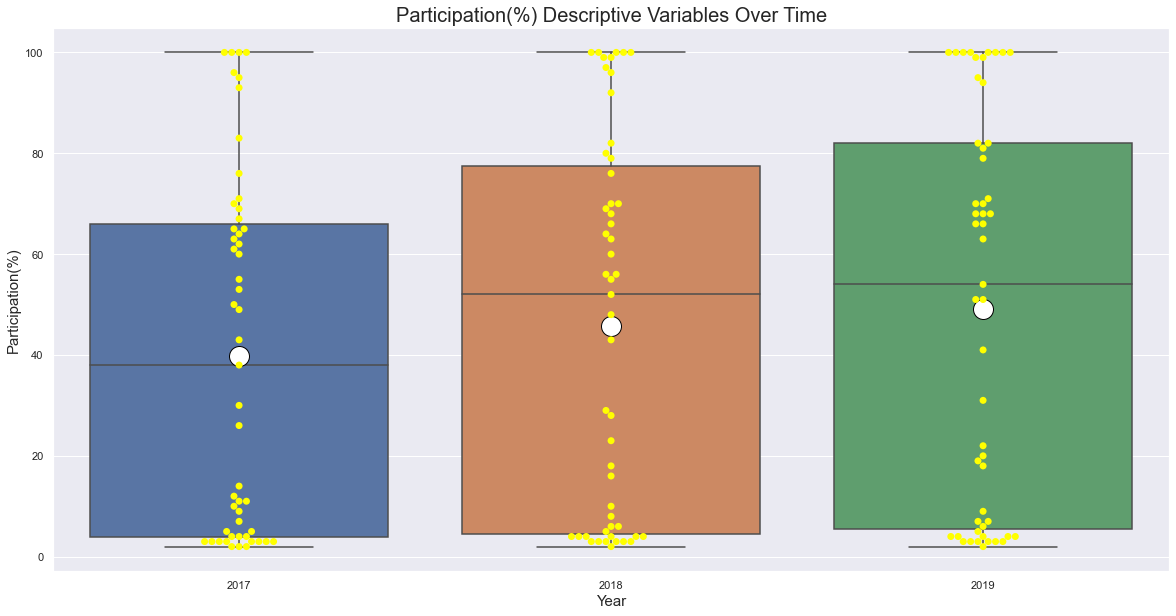

In [45]:
# join df's
df = pd.concat([df_SAT_2017_cleaned, df_SAT_2018_cleaned, df_SAT_2019_cleaned])
# figure size
sns.set(rc = {'figure.figsize':(20,10)})
# boxplot
sns.boxplot(x='year', y='participation', data=df, showmeans=True, 
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"20"})
# scatter
sns.swarmplot(x='year', y='participation', data=df, color="yellow", size=7)
# label
plt.ylabel("Participation(%)", size=15)
plt.xlabel("Year", size=15)
plt.title("Participation(%) Descriptive Variables Over Time", size=20)
plt.savefig("./img/part_descrip_SAT.png")

In [46]:
print(round(df_SAT_2017_cleaned.describe().mean()['participation'], 2))
print(round(df_SAT_2018_cleaned.describe().mean()['participation'], 2))
print(round(df_SAT_2019_cleaned.describe().mean()['participation'], 2))

42.01
46.26
47.79


Conversly as opposed to the ACT a higher Participation is is shown year by year.  It seems less people are taking the ACT and more Taking the SAT.

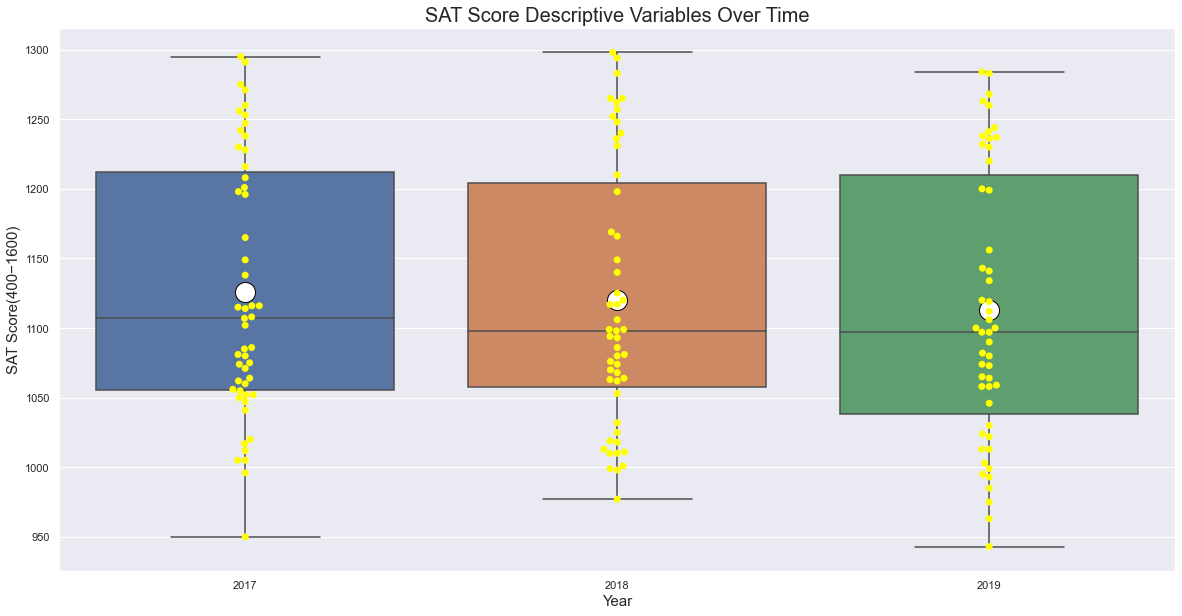

In [47]:
# join df's
df = pd.concat([df_SAT_2017_cleaned, df_SAT_2018_cleaned, df_SAT_2019_cleaned])
# fig size
sns.set(rc = {'figure.figsize':(20,10)})
# boxplot
sns.boxplot(x='year', y='total', data=df, showmeans=True, 
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"20"})
# scatter
sns.swarmplot(x='year', y='total', data=df, color="yellow", size=7)
# label
plt.ylabel("SAT Score(400−1600)", size=15)
plt.xlabel("Year", size=15)
plt.title("SAT Score Descriptive Variables Over Time", size=20)
plt.savefig("./img/score_descrip_SAT.png")

In [48]:
# print mean variables
print(round(df_SAT_2017_cleaned.describe().mean()['total'], 2))
print(round(df_SAT_2018_cleaned.describe().mean()['total'], 2))
print(round(df_SAT_2019_cleaned.describe().mean()['total'], 2))

861.14
862.46
854.16


Analysis: Average SAT score has a slight decline because all of the student leaving the ACT to Take the SAT are dropping the Average Score

In [49]:
# combine df's
df_SAT = pd.concat([df_SAT_2017_cleaned, df_SAT_2018_cleaned, df_SAT_2019_cleaned])
df_SAT = df.convert_dtypes()
df_SAT.reset_index(inplace=True)

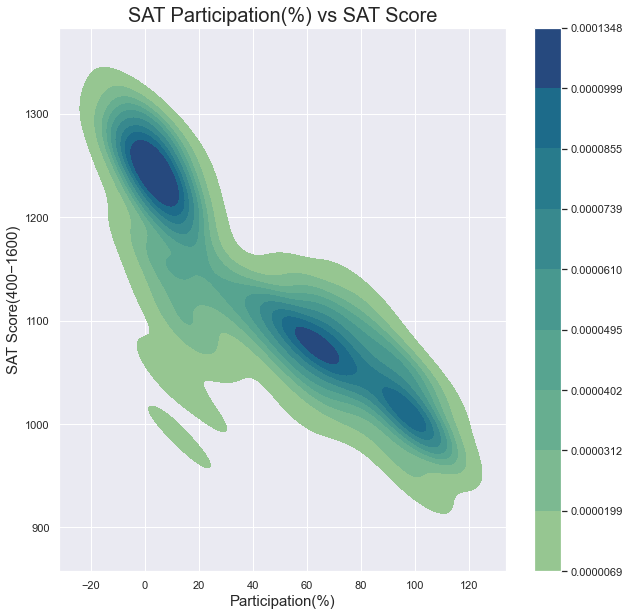

In [50]:
# set figure size
sns.set(rc = {'figure.figsize':(10,10)})
# graph
sns.kdeplot(x=df_SAT['participation'], y=df_SAT['total'], cmap="crest", shade=True, bw_adjust=0.7, cbar=True)
#label
plt.ylabel("SAT Score(400−1600)", size=15)
plt.xlabel("Participation(%)", size=15)
plt.title("SAT Participation(%) vs SAT Score", size=20)
plt.savefig("./img/part_score_SAT.png")

Analysis: As participation Increases the score Decreases this is due to the fact that more student who arent prepared for the exams take the exams.

In [51]:
# import libraies
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# extract 5 worst participation, composite
worst_SATp_2017 = SAT_2017_cleaned.sort_values(by='participation').head(5)
worst_SATt_2017 = SAT_2017_cleaned.sort_values(by='total').head(5)

# make subplot
fig = make_subplots(rows=2, cols=3, specs = [[{}, {}, {}],[{}, {}, {}]], horizontal_spacing = 0.12, vertical_spacing=0.15)
# add participation trace
fig.add_trace(
    go.Bar(x=worst_SATp_2017["participation"], y=worst_SATp_2017["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1', legendgrouptitle_text="Participation", name="%"),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=worst_SATp_2017["total"], y=worst_SATp_2017["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2', legendgrouptitle_text='Average Total Score', name="SAT Score"),
    row=1, col=1
)

# add composite trace
fig.add_trace(
    go.Bar(x=worst_SATt_2017["participation"], y=worst_SATt_2017["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=worst_SATt_2017["total"], y=worst_SATt_2017["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=2, col=1
)
fig.update_xaxes(title_text="2017", row=2, col=1)

# # extract 5 worst participation, composite
worst_SATp_2018 = SAT_2018_cleaned.sort_values(by='participation').head(5)
worst_SATt_2018 = SAT_2018_cleaned.sort_values(by='total').head(5) 

# add participation trace
fig.add_trace(
    go.Bar(x=worst_SATp_2018["participation"], y=worst_SATp_2018["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=worst_SATp_2018["total"], y=worst_SATp_2018["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=1, col=2
)

# add composite trace
fig.add_trace(
    go.Bar(x=worst_SATt_2018["participation"], y=worst_SATt_2018["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=worst_SATt_2018["total"], y=worst_SATt_2018["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=2, col=2
)
fig.update_xaxes(title_text="2018", row=2, col=2)



# # extract 5 worst participation, composite
worst_SATp_2019 = SAT_2019_cleaned.sort_values(by='participation').head(5)
worst_SATt_2019 = SAT_2019_cleaned.sort_values(by='total').head(5)

fig.add_trace(
    go.Bar(x=worst_SATp_2019["participation"], y=worst_SATp_2019["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=1, col=3
)
fig.add_trace(
    go.Bar(x=worst_SATp_2019["total"], y=worst_SATp_2019["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=1, col=3
)
# add composite trace
fig.add_trace(
    go.Bar(x=worst_SATt_2019["participation"], y=worst_SATt_2019["state"], orientation='h', marker={'color': 'blue'}, legendgroup='group1',showlegend=False),
    row=2, col=3
)
fig.add_trace(
    go.Bar(x=worst_SATt_2019["total"], y=worst_SATt_2019["state"], orientation='h', marker={'color': 'red'}, legendgroup='group2',showlegend=False),
    row=2, col=3
)
fig.update_xaxes(title_text="2019", row=2, col=3)

fig.update_yaxes(title_text="Low Score", row=2, col=1)
fig.update_yaxes(title_text="High Score", row=1, col=1)


fig.update_layout(
    boxmode='group', 
    boxgap=0.8,
    boxgroupgap=0.7,
    paper_bgcolor='rgba(0,0,0,0)',
    showlegend=True,
    title_text="Top 5 SAT Low and High Composite Scores/Participation(%)"
)


# fig.write_image(file='./img/low_high_5_SAT.png', format='png', width=1000)

In [52]:
# find most common states in participation
worst_partic = pd.concat([worst_SATp_2019, worst_SATp_2018, worst_SATp_2017])
SAT_worstp_state = worst_partic.groupby(['state'])['state'].count().sort_values(ascending=True)
# find most common states in composite
worst_score = pd.concat([worst_SATt_2019, worst_SATt_2018, worst_SATt_2017])
SAT_worsts_state = worst_score.groupby(['state'])['state'].count().sort_values(ascending=True)
print(SAT_worstp_state)
print(SAT_worsts_state)

state
Iowa            1
Mississippi     1
Missouri        1
Utah            1
Nebraska        2
South Dakota    2
Wisconsin       2
Wyoming         2
North Dakota    3
Name: state, dtype: int64
state
Maine                   1
Michigan                1
Oklahoma                1
Utah                    1
West Virginia           2
Delaware                3
District of Columbia    3
Idaho                   3
Name: state, dtype: int64


In [53]:
avg_total_low_participation = pd.concat([worst_SATp_2019, worst_SATp_2018, worst_SATp_2017])
# get the values for the top 5 low rows graphed
print(avg_total_low_participation.groupby(['state'])['total'].mean())
print(avg_total_low_participation.groupby(['state'])['participation'].mean())

state
Iowa            1275.000000
Mississippi     1242.000000
Missouri        1271.000000
Nebraska        1256.000000
North Dakota    1267.333333
South Dakota    1254.000000
Utah            1238.000000
Wisconsin       1288.500000
Wyoming         1247.500000
Name: total, dtype: float64
state
Iowa            2.0
Mississippi     2.0
Missouri        3.0
Nebraska        3.0
North Dakota    2.0
South Dakota    3.0
Utah            3.0
Wisconsin       3.0
Wyoming         3.0
Name: participation, dtype: float64


In [117]:
avg_total_high_participation = pd.concat([worst_SATt_2019, worst_SATt_2018, worst_SATt_2017])
# get the values for the top 5 high rows graphed
print(avg_total_high_participation.groupby(['state'])['total'].mean())
print(avg_total_high_participation.groupby(['state'])['participation'].mean())

state
Delaware                 993.000000
District of Columbia     967.333333
Idaho                    999.666667
Maine                   1012.000000
Michigan                1005.000000
Oklahoma                 963.000000
Utah                    1010.000000
West Virginia            971.000000
Name: total, dtype: float64
state
Delaware                100.000000
District of Columbia     95.333333
Idaho                    97.666667
Maine                    95.000000
Michigan                100.000000
Oklahoma                 22.000000
Utah                      4.000000
West Virginia            63.500000
Name: participation, dtype: float64


In terms of sates being affected the most by the new format of the SAT.

## Conclusions and Recommendations

  College Board Should put more focus on locations such as Mississippi, Nevada, and South Carolina for ACT Prep Coursework due to there high particiaption percentage but low testing scores. While for the SAT College Board needs to put more focus on locations such as Delaware, District of Columbia, Idaho due to there low participation and lower composite score. In ters of the SAT new format preformace I believe it is bad.  Although, the SAT had recently been changed it seems less and less people are taking the SAT year by year.  This might be related to the stigma of the difficulty of the SAT.  If this stigma doesnt change and participation doesnt increase in another 3 years I believe another reformat of the SAT should be considered.